# MODELLING THE BETA IN PYTHON

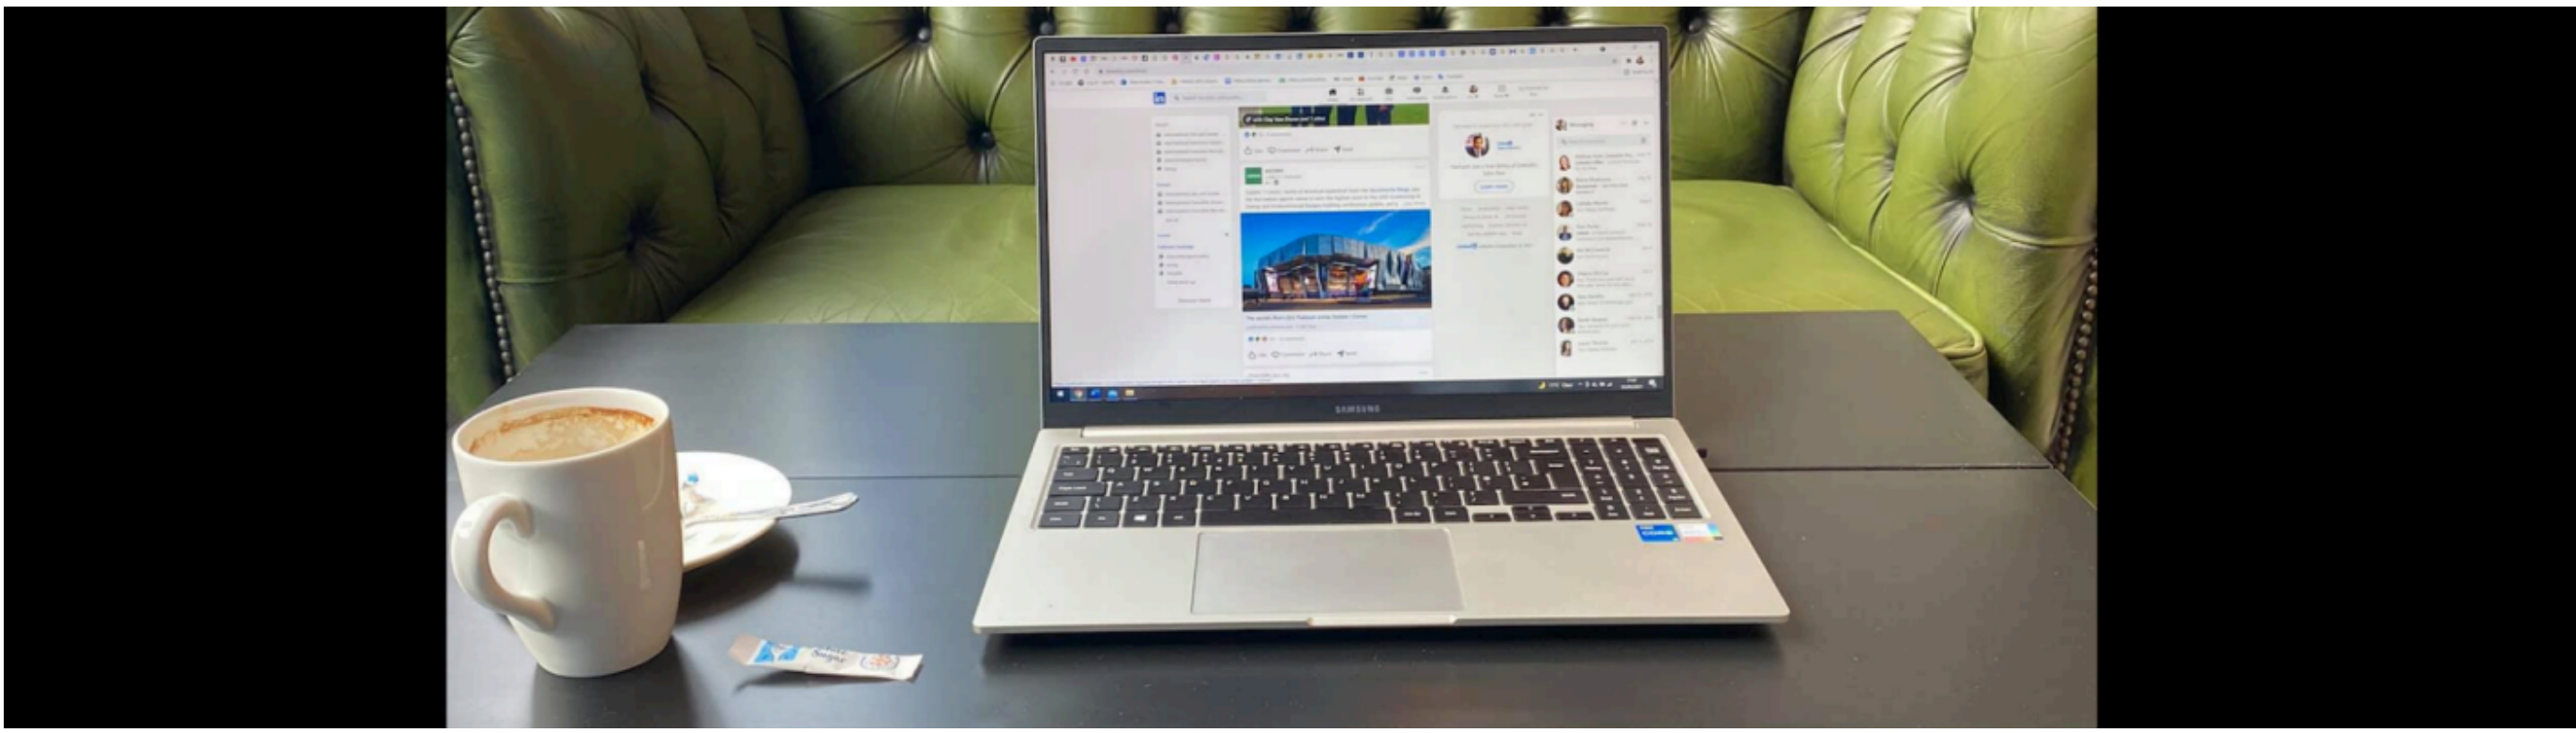

### HEMANT THAPA

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
import math as mt
import statistics as st
import missingno as msno

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

A stock that swings more than the market over time has a beta greater than 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks tend to be riskier but provide the potential for higher returns. Low-beta stocks pose less risk but typically yield lower returns.

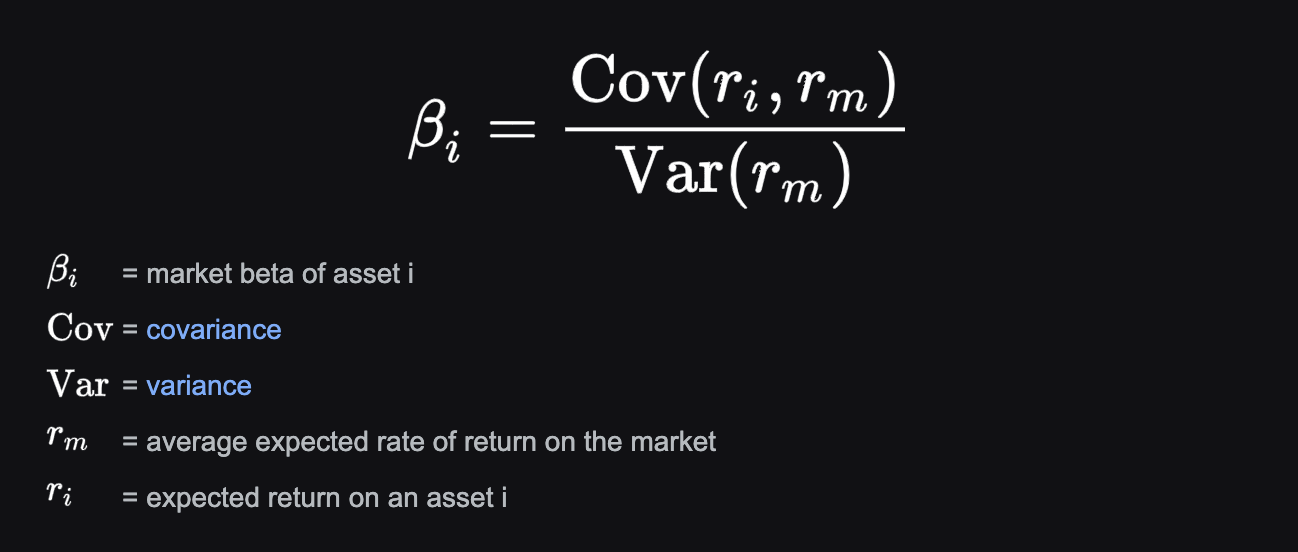

Covariance measures how two stocks move together. A positive covariance means the stocks tend to move together when their prices go up or down. A negative covariance means the stocks move opposite of each other.

Variance, on the other hand, refers to how far a stock moves relative to its mean. For example, variance is used in measuring the volatility of an individual stock's price over time. Covariance is used to measure the correlation in price moves of two different stocks.

In [295]:
class stock:
    def __init__(self, ticker, time):
        self.ticker = ticker
        self.time = time
        
    def chart(self):
        return yf.download(self.ticker, period=self.time)

In [296]:
ftse = stock("^FTSE", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


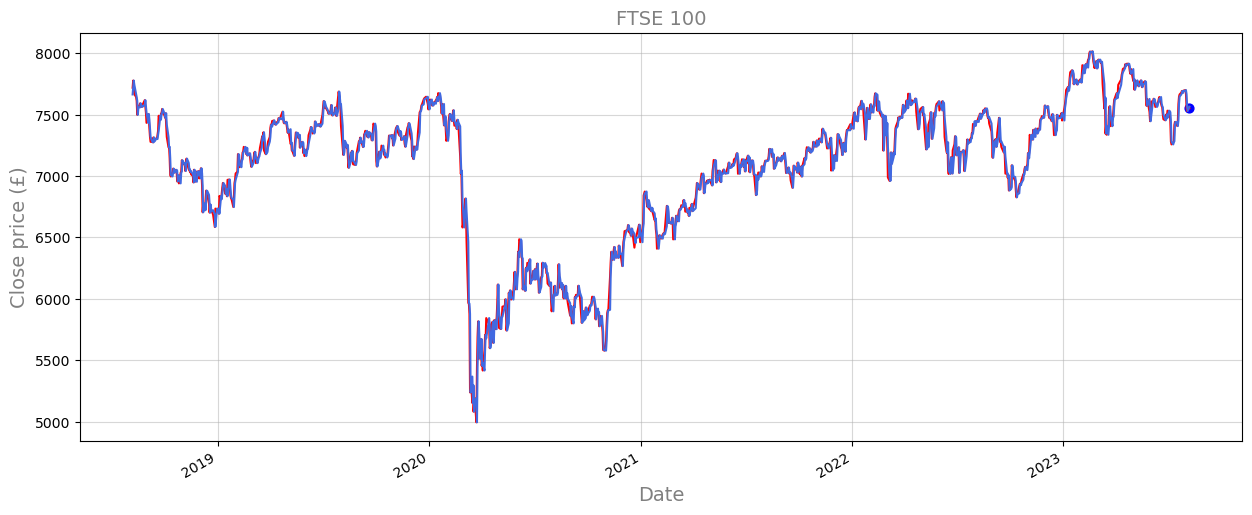

In [297]:
plt.figure(figsize=(15,6))
ftse.Close.plot(color="red")
ftse.Open.plot(color="royalblue")
plt.scatter(ftse.index[-1], ftse.Close[-1], s=40, color="blue")
plt.grid(True, alpha=0.5)
plt.title("FTSE 100", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [298]:
ftse.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1.261000e+03
mean,7078.476506,7123.105046,7032.396320,7078.336989,7078.336989,8.086502e+08
std,556.410063,544.921265,567.998747,556.346147,556.346147,2.986112e+08
min,4993.899902,5181.000000,4898.799805,4993.899902,4993.899902,0.000000e+00
25%,6885.299805,6938.299805,6836.100098,6885.299805,6885.299805,6.319410e+08
50%,7211.600098,7250.100098,7170.299805,7211.600098,7211.600098,7.452301e+08
75%,7471.500000,7510.500000,7432.200195,7471.500000,7471.500000,9.027473e+08
max,8014.299805,8047.100098,7995.500000,8014.299805,8014.299805,2.585566e+09


In [299]:
astra_zeneca_plc = stock("AZN.L", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


### CONVERTING PENCE INTO POUND £

In [300]:
astra_zeneca_plc['Close'] = astra_zeneca_plc['Close']/100
astra_zeneca_plc['Open'] = astra_zeneca_plc['Open']/100

In [301]:
astra_zeneca_plc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,111.76,11254.0,11148.0,111.96,11196.0,955804
2023-08-02,110.40,11140.0,10874.0,110.96,11096.0,1371970
2023-08-03,110.18,11018.0,10778.0,109.00,10900.0,4910009
2023-08-04,109.52,10968.0,10784.0,109.10,10910.0,1506764
2023-08-07,108.94,10944.0,10804.0,108.90,10890.0,320114


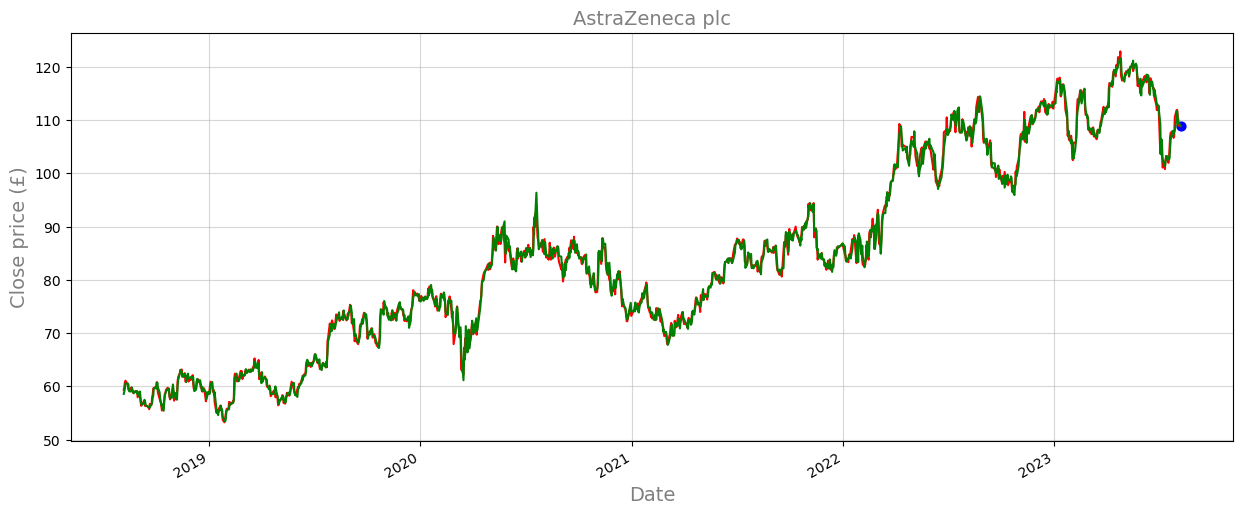

In [302]:
plt.figure(figsize=(15,6))
astra_zeneca_plc.Close.plot(color="red")
plt.scatter(astra_zeneca_plc.index[-1], astra_zeneca_plc.Close[-1], s=40, color="blue")
astra_zeneca_plc.Open.plot(color="green")
plt.grid(True, alpha=0.5)
plt.title("AstraZeneca plc", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [303]:
astra_zeneca_plc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,83.944625,8489.234024,8305.809478,83.977787,7982.090159,2.440980e+06
std,17.958205,1812.669522,1783.251264,17.984978,1997.485424,2.015486e+06
min,53.450000,5391.000000,5312.000000,53.250000,4690.736816,6.793300e+04
25%,71.202500,7232.487793,7025.637573,71.322500,6602.318481,1.609940e+06
50%,82.995000,8397.000000,8199.451172,82.915000,7853.386230,2.140252e+06
75%,99.475000,10044.000000,9827.000000,99.440000,9801.009277,2.858223e+06
max,121.640000,12828.452148,12122.066406,122.940000,12294.000000,6.029139e+07


In [304]:
data = {"FTSE":ftse.Close,
       "AZN":astra_zeneca_plc.Close}

In [305]:
data = pd.DataFrame(data)

In [306]:
data[:5]

,FTSE,AZN
Date,,
2018-08-07,7718.500000,59.35
2018-08-08,7776.700195,59.89
2018-08-09,7741.799805,60.76
2018-08-10,7667.000000,61.07
2018-08-13,7642.500000,60.52


In [307]:
returns = np.log(data/data.shift(1))

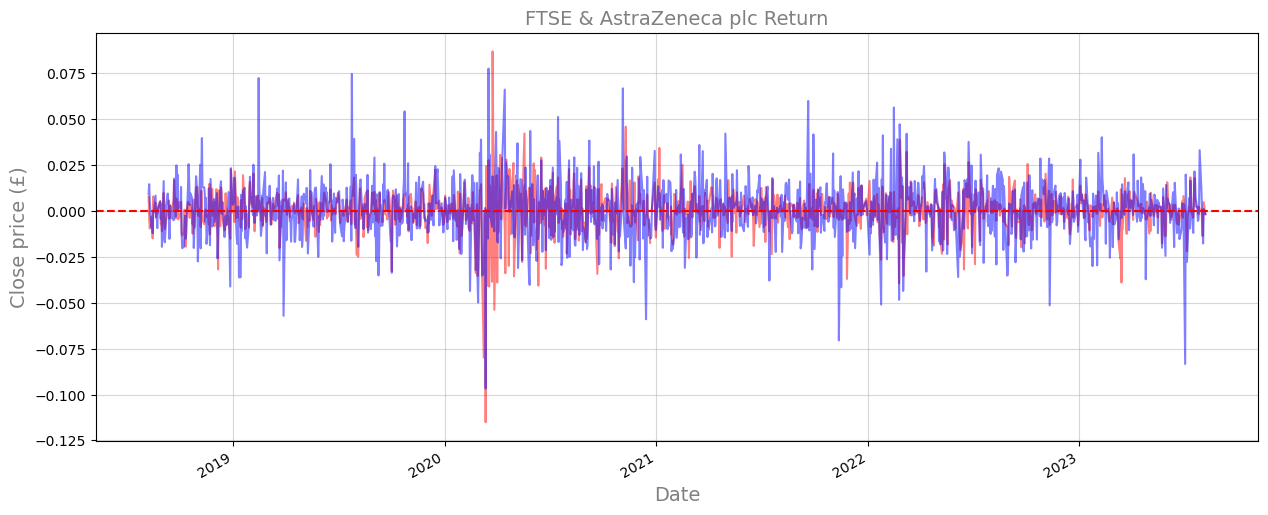

In [308]:
plt.figure(figsize=(15,6))
returns.FTSE.plot(color="red", alpha=0.5)
returns.AZN.plot(color="blue", alpha=0.5)
plt.grid(True, alpha=0.5)
plt.title("FTSE & AstraZeneca plc Return", fontsize=14, color="grey")
plt.axhline(0, color="red", linestyle="--")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [309]:
returns.dropna(inplace=True)

In [310]:
ftse_var = returns.FTSE.var()

In [311]:
ftse_var

0.0001276298333205989

In [312]:
returns_cov = returns.cov()
returns_cov

,FTSE,AZN
FTSE,0.000128,0.000080
AZN,0.000080,0.000253


In [313]:
azn_var = returns_cov.iloc[0,1]
azn_var

8.01241852456341e-05

In [314]:
azn_var/ftse_var

0.6277857077848461

### FTSE100 & AZN COVARIANCE

In [315]:
st.covariance(returns.FTSE, returns.AZN)

8.012418524563412e-05

### FTSE100 VARIANCE 

In [316]:
st.variance(returns.FTSE)

0.0001276298333205985

### Beta = Covariance (Rs, RI) / Variance (RI)

#### Rs is the return of the stock

#### RI is the return of the index

In [317]:
st.covariance(returns.FTSE, returns.AZN)/st.variance(returns.FTSE)

0.6277857077848482

In [318]:
X = returns['FTSE'].values.reshape(-1,1)
y = returns['AZN'].values

In [319]:
X.shape

(1259, 1)

In [320]:
y.shape

(1259,)

In [321]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

### AstraZeneca PLC BETA

In [322]:
print(f"Beta of AstraZeneca PLC: {model.coef_[0]}")

Beta of AstraZeneca PLC: 0.6277857077848473


In [323]:
model.intercept_

0.000522669354856719

In [324]:
y_pred = model.predict(X)

In [325]:
y_pred[:10]

array([ 0.00523864, -0.00230106, -0.00557237, -0.00148664, -0.00202072,
       -0.00892578,  0.00540176,  0.00070543,  0.00323271, -0.00159795])

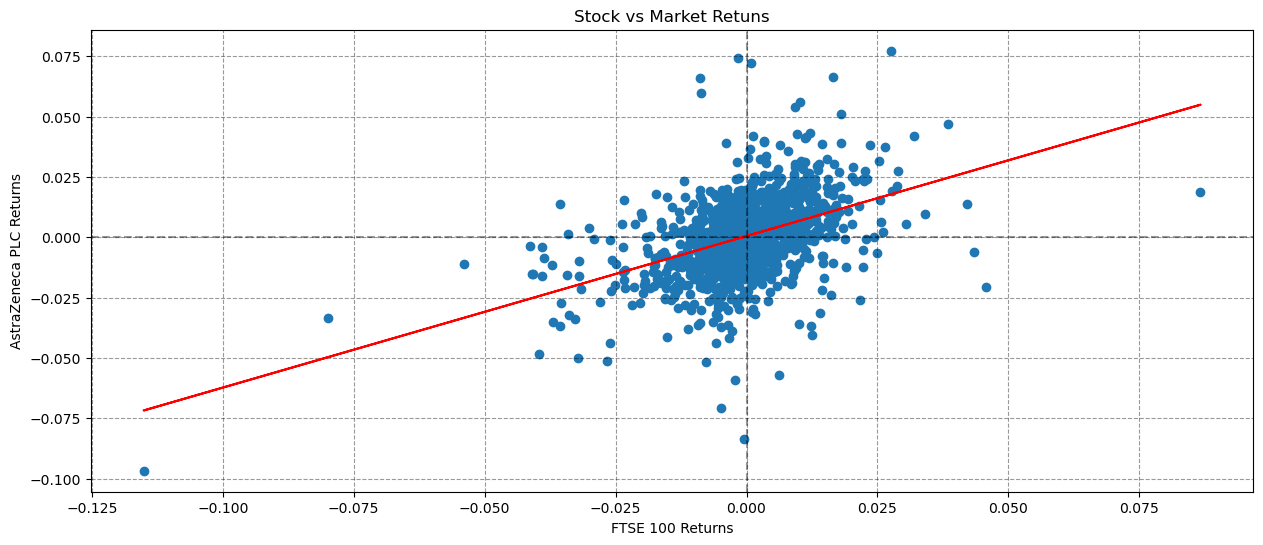

In [331]:
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.plot(X, y_pred, color="red")
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("AstraZeneca PLC Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")
plt.show()

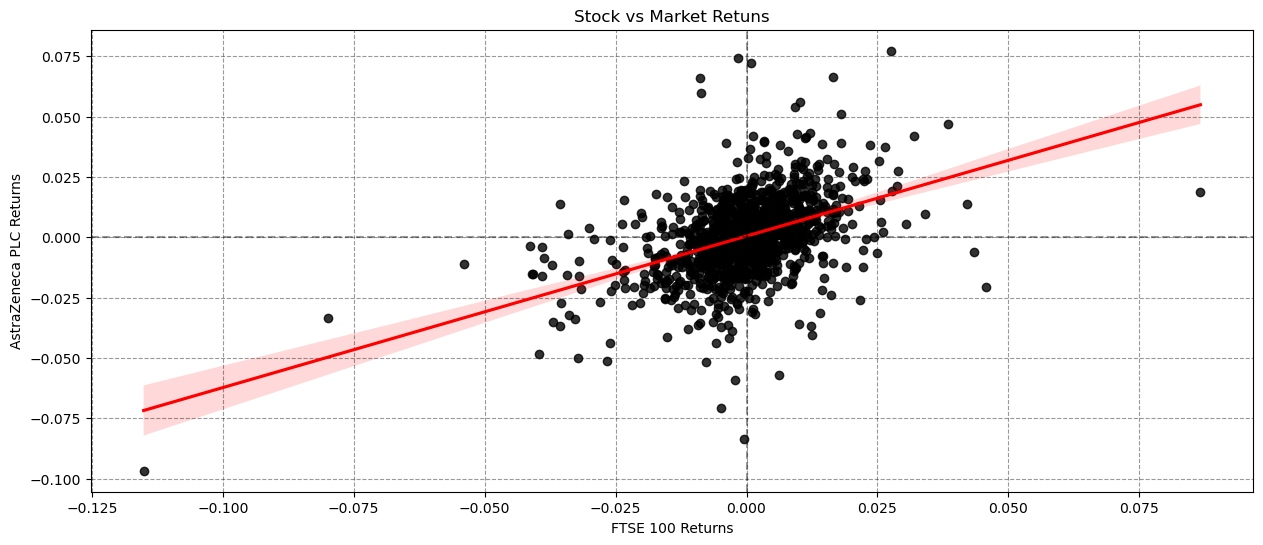

In [332]:
plt.figure(figsize=(15,6))
sns.regplot(x = "FTSE", y = "AZN", data = returns, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("AstraZeneca PLC Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")

In [335]:
stock_ticker = ['III.L','ABDN.L','ADM.L','AAF.L','AAL.L','ANTO.L','AHT.L','ABF.L','AZN.L','AUTO.L',
                'AV.L','BME.L','BA.L','BARC.L','BDEV.L','BEZ.L','BKG.L','BP.L','BATS.L','BT.A.L',
                'BNZL.L','BRBY.L','CNA.L','CCH.L','CPG.L','CTEC.L','CRH.L','CRDA.L','DCC.L','DGE.L',
                'EDV.L','ENT.L','EXPN.L','FCIT.L','FLTR.L','FRAS.L','FRES.L','GLEN.L','GSK.L','HLN.L',
                'HLMA.L','HL.L','HSX.L','HSBA.L','IMI.L','IMB.L','INF.L','IHG.L','IAG.L','ITRK.L',
                'JD.L','JMAT.L','KGF.L','LAND.L','LGEN.L','LLOY.L','LSEG.L','MNG.L','MRO.L',
                'MNDI.L','NG.L','NWG.L','NXT.L','OCDO.L','PSON.L','PSH.L','PSN.L','PHNX.L','PRU.L',
                'RKT.L','REL.L','RTO.L','RMV.L','RIO.L','RR.L','RS1.L','SGE.L','SBRY.L','SDR.L',
                'SMT.L','SGRO.L','SVT.L','SHEL.L','SN.L','SMDS.L','SMIN.L','SKG.L','SPX.L','SSE.L',
                'STJ.L','STAN.L','TW.L','TSCO.L','ULVR.L','UTG.L','UU.L','VOD.L','WEIR.L','WTB.L','WPP.L']

In [336]:
print(stock_ticker)

['III.L', 'ABDN.L', 'ADM.L', 'AAF.L', 'AAL.L', 'ANTO.L', 'AHT.L', 'ABF.L', 'AZN.L', 'AUTO.L', 'AV.L', 'BME.L', 'BA.L', 'BARC.L', 'BDEV.L', 'BEZ.L', 'BKG.L', 'BP.L', 'BATS.L', 'BT.A.L', 'BNZL.L', 'BRBY.L', 'CNA.L', 'CCH.L', 'CPG.L', 'CTEC.L', 'CRH.L', 'CRDA.L', 'DCC.L', 'DGE.L', 'EDV.L', 'ENT.L', 'EXPN.L', 'FCIT.L', 'FLTR.L', 'FRAS.L', 'FRES.L', 'GLEN.L', 'GSK.L', 'HLN.L', 'HLMA.L', 'HL.L', 'HSX.L', 'HSBA.L', 'IMI.L', 'IMB.L', 'INF.L', 'IHG.L', 'IAG.L', 'ITRK.L', 'JD.L', 'JMAT.L', 'KGF.L', 'LAND.L', 'LGEN.L', 'LLOY.L', 'LSEG.L', 'MNG.L', 'MRO.L', 'MNDI.L', 'NG.L', 'NWG.L', 'NXT.L', 'OCDO.L', 'PSON.L', 'PSH.L', 'PSN.L', 'PHNX.L', 'PRU.L', 'RKT.L', 'REL.L', 'RTO.L', 'RMV.L', 'RIO.L', 'RR.L', 'RS1.L', 'SGE.L', 'SBRY.L', 'SDR.L', 'SMT.L', 'SGRO.L', 'SVT.L', 'SHEL.L', 'SN.L', 'SMDS.L', 'SMIN.L', 'SKG.L', 'SPX.L', 'SSE.L', 'STJ.L', 'STAN.L', 'TW.L', 'TSCO.L', 'ULVR.L', 'UTG.L', 'UU.L', 'VOD.L', 'WEIR.L', 'WTB.L', 'WPP.L']


In [374]:
united_kingdom_chart = stock(stock_ticker, "1Y").chart()

[*********************100%***********************]  100 of 100 completed

1 Failed download:
- BT.A.L: No data found, symbol may be delisted


In [375]:
close = united_kingdom_chart['Close']/100

In [376]:
close[:5]

,AAF.L,AAL.L,ABDN.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-08 00:00:00,1.521,29.490,1.7295,16.59,19.840,45.36,11.890,6.618,4.101,107.14,...,29.68,2.621,1.2520,40.020,11.36,11.045,1.2102,16.795,8.168,26.58
2022-08-09 00:00:00,1.542,29.285,1.6115,16.40,19.675,44.73,11.855,6.442,4.143,108.42,...,29.93,2.637,1.2280,39.935,11.33,11.120,1.2228,16.190,7.980,25.99
2022-08-10 00:00:00,1.534,29.570,1.7135,16.61,22.160,46.87,11.930,6.632,4.649,108.18,...,29.97,2.670,1.2690,39.485,11.71,11.225,1.2122,16.515,8.150,26.81
2022-08-11 00:00:00,1.459,30.070,1.7285,16.49,22.340,46.14,11.670,6.644,4.633,105.06,...,29.73,2.650,1.2455,39.210,11.57,11.150,1.2122,16.605,8.220,26.55
2022-08-12 00:00:00,1.443,29.630,1.7560,16.60,22.580,45.79,11.445,6.588,4.679,107.12,...,29.73,2.634,1.2360,39.055,11.75,11.205,1.2158,16.510,8.118,26.76


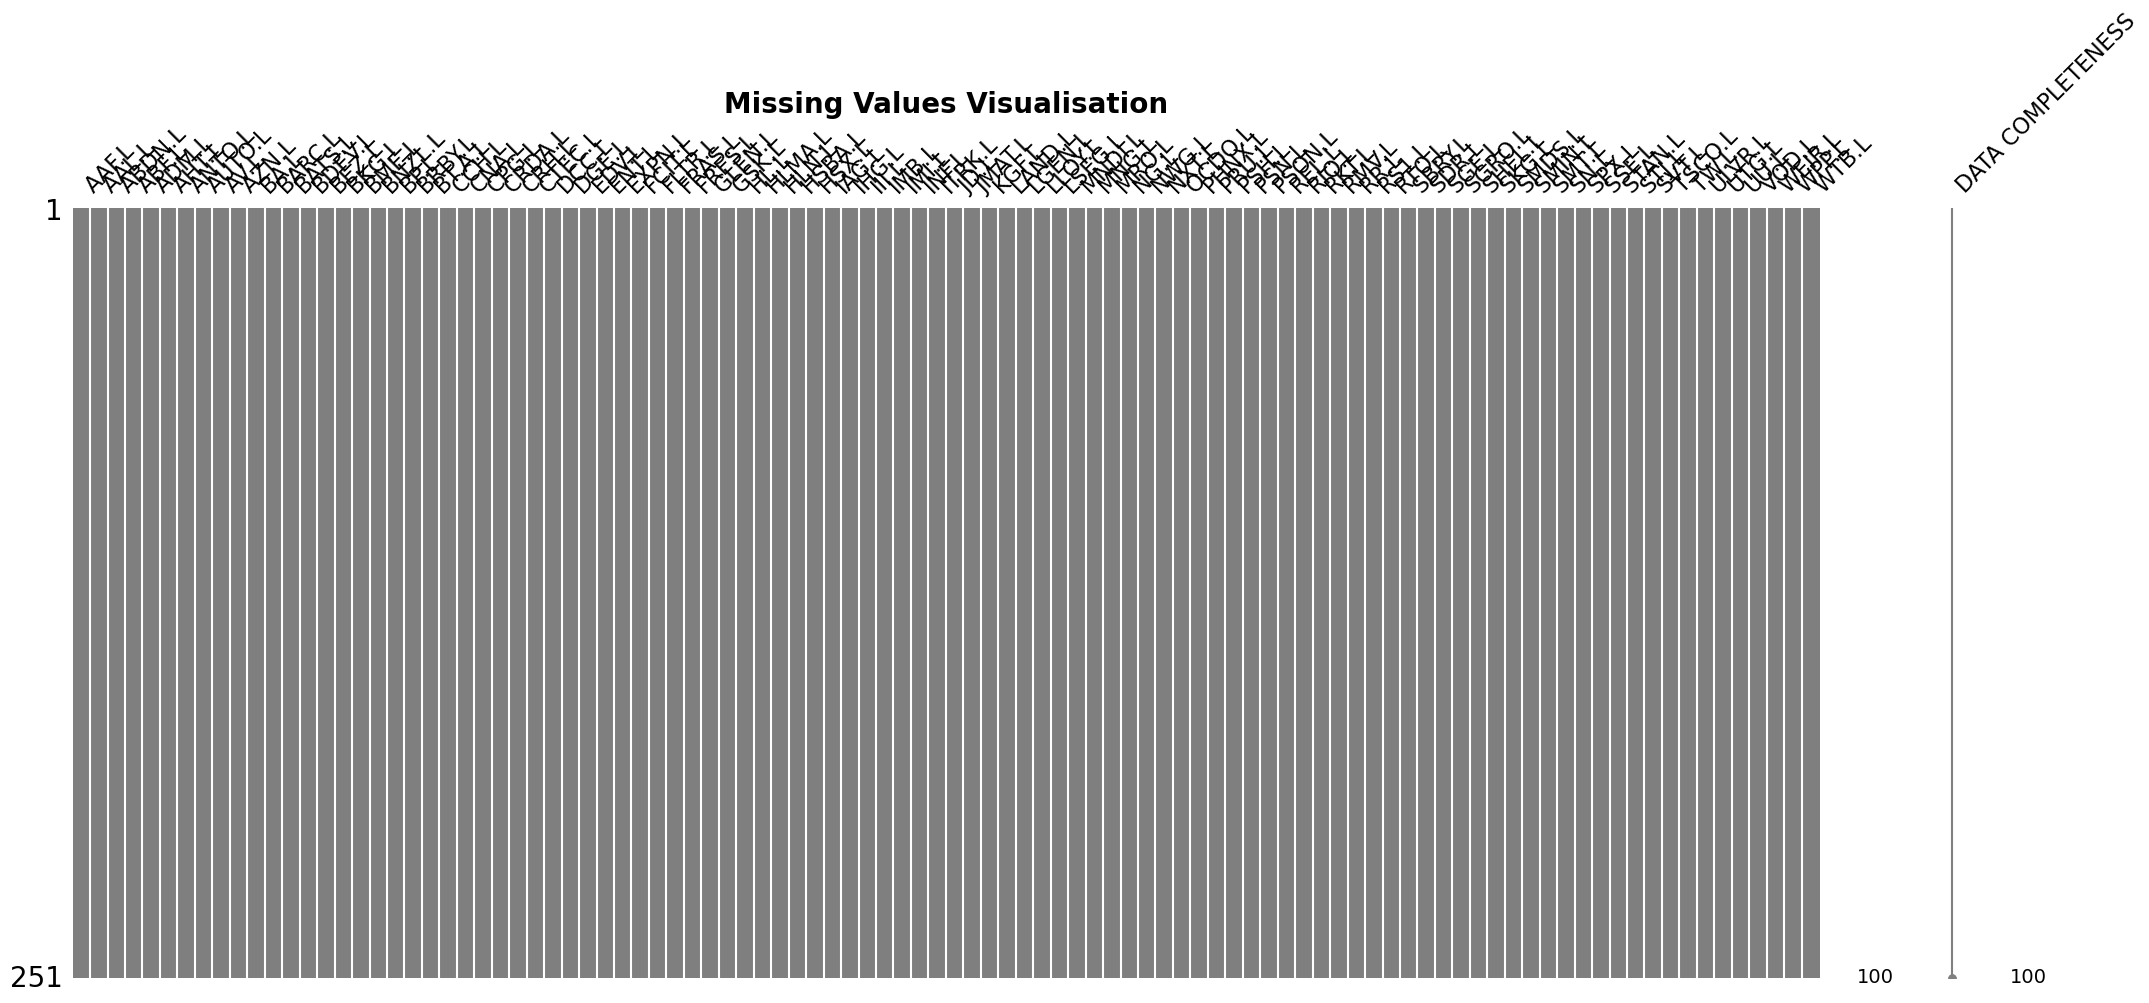

In [399]:
msno.matrix(close, color=(0.5, 0.5, 0.5), labels=True)
plt.title('Missing Values Visualisation', fontsize=20, fontweight='bold')
plt.show()

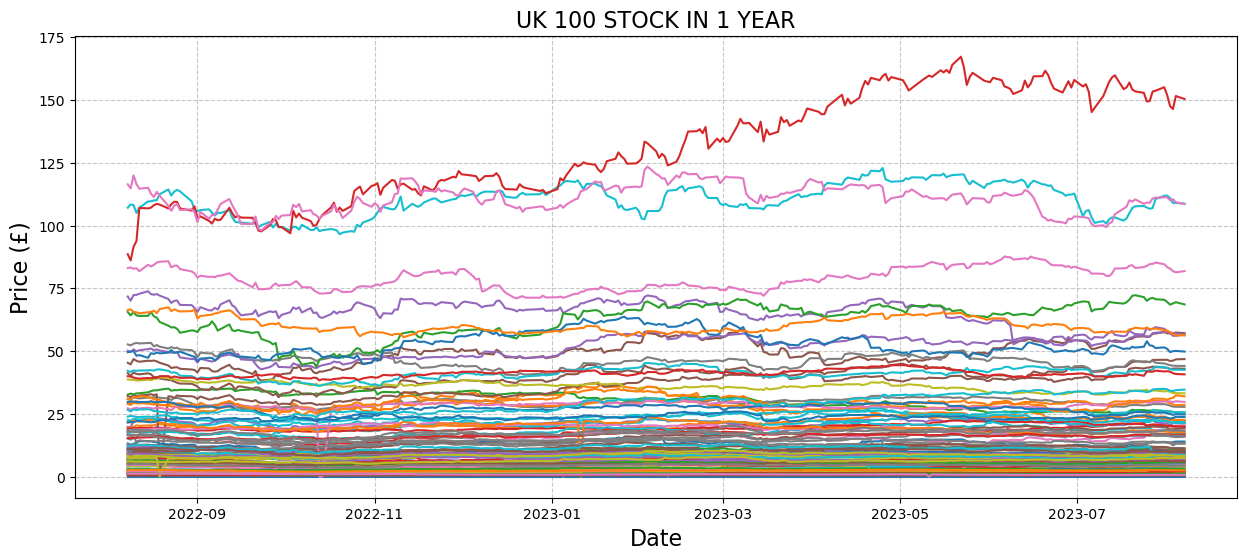

In [404]:
plt.figure(figsize=(15,6))
plt.plot(close.index, close.values)
plt.title("UK 100 STOCK IN 1 YEAR", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price (£)", fontsize=16)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [408]:
#Stock price above 50 pounds
mask_above_50.columns

Index(['AAF.L', 'AAL.L', 'ABDN.L', 'ABF.L', 'ADM.L', 'AHT.L', 'ANTO.L',
       'AUTO.L', 'AV.L', 'AZN.L', 'BA.L', 'BARC.L', 'BATS.L', 'BDEV.L',
       'BEZ.L', 'BKG.L', 'BME.L', 'BNZL.L', 'BP.L', 'BRBY.L', 'BT.A.L',
       'CCH.L', 'CNA.L', 'CPG.L', 'CRDA.L', 'CRH.L', 'CTEC.L', 'DCC.L',
       'DGE.L', 'EDV.L', 'ENT.L', 'EXPN.L', 'FCIT.L', 'FLTR.L', 'FRAS.L',
       'FRES.L', 'GLEN.L', 'GSK.L', 'HL.L', 'HLMA.L', 'HLN.L', 'HSBA.L',
       'HSX.L', 'IAG.L', 'IHG.L', 'III.L', 'IMB.L', 'IMI.L', 'INF.L', 'ITRK.L',
       'JD.L', 'JMAT.L', 'KGF.L', 'LAND.L', 'LGEN.L', 'LLOY.L', 'LSEG.L',
       'MNDI.L', 'MNG.L', 'MRO.L', 'NG.L', 'NWG.L', 'NXT.L', 'OCDO.L',
       'PHNX.L', 'PRU.L', 'PSH.L', 'PSN.L', 'PSON.L', 'REL.L', 'RIO.L',
       'RKT.L', 'RMV.L', 'RR.L', 'RS1.L', 'RTO.L', 'SBRY.L', 'SDR.L', 'SGE.L',
       'SGRO.L', 'SHEL.L', 'SKG.L', 'SMDS.L', 'SMIN.L', 'SMT.L', 'SN.L',
       'SPX.L', 'SSE.L', 'STAN.L', 'STJ.L', 'SVT.L', 'TSCO.L', 'TW.L',
       'ULVR.L', 'UTG.L', 'UU.L', 'VOD.L', 'W

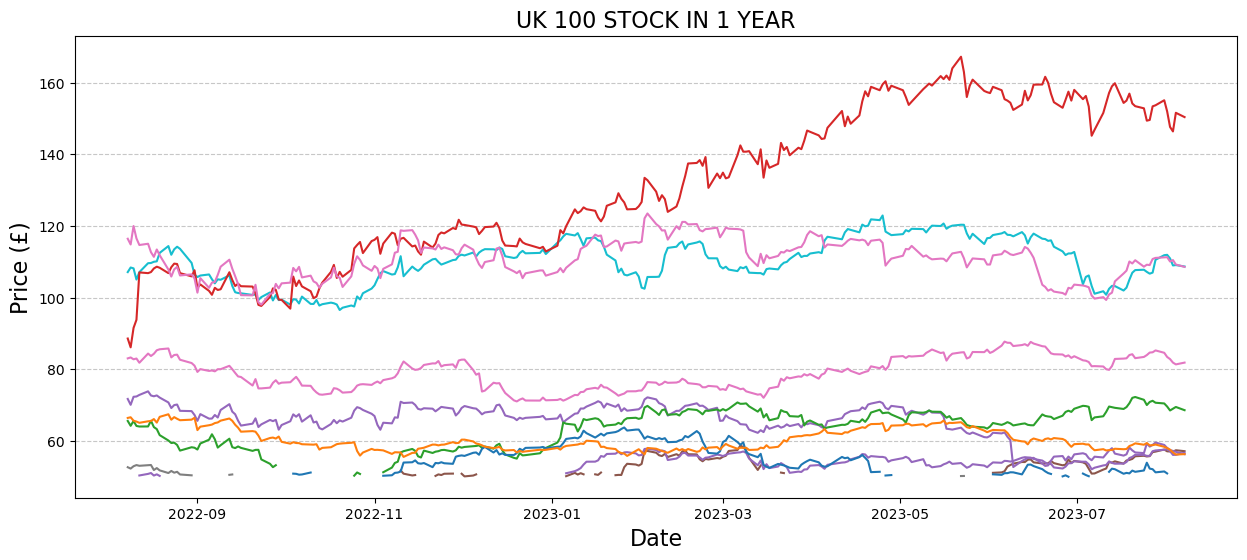

In [406]:
mask_above_50 = close > 50
close[~mask_above_50] = np.nan
plt.figure(figsize=(15, 6))
plt.plot(close.index, close.values)
plt.title("UK 100 STOCK IN 1 YEAR", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price (£)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## REFERENCE

https://www.marketwatch.com/investing/stock/azn?countrycode=uk
    
https://www.astrazeneca.co.uk/